In [1]:
from modelrecords.repository import Repository
import pygraphviz as pgv
def render_modelgraph(nodes, edges):
    G = pgv.AGraph(directed=True, strict=True, rankdir="LR")
    for node in nodes:
        G.add_node(node, shape="box", style="rounded, filled", fillcolor="lightgrey", fontname="Helvetica")
    for A, B in edges:
        G.add_edge(B, A, color="black", penwidth=1.2)

    G.graph_attr.update(dpi="90", size="10,7", ranksep="0.25", nodesep="0.25", margin="1")
    G.node_attr.update(fontsize="8", fontcolor="black", color="black")
    G.edge_attr.update(fontsize="8", fontcolor="black", color="black")
    G.layout(prog="dot") 
    return G


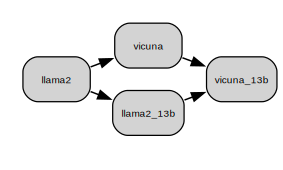

In [4]:
repo = Repository()
mr = repo.find('vicuna_13b')
nodes, edges = repo.find_parent_packages(mr)
display(render_modelgraph(nodes, edges))